In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import random

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
ATTRITION_POP = 'Data/attrition.feather'
SPOTIFY = 'Data/spotify_2000_2020.feather'

In [3]:
def printest(args, value):
    return print( "{} : \n {} \n".format(args, value) )

# Data and Sampling Distributions

# **Random Sampling**

Random sampling helps to reduce selection bias. When samples are not randomly selected, there's a risk that the samples may be biased in some way. Bias can occur when samples are selected based on convenience or the subjective judgement of the researcher. A random sample helps to ensure that every member of the population has an equal chance of being included, which reduces the potential for bias.

The more random and less biased the sample, the more likely it is to reflect the true characteristics of the population, and therefore, the smaller the sampling error.

Here we use a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.



In [4]:
attrition_pop = pd.read_feather(ATTRITION_POP)
attrition_pop.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0


**Simple Random Sampling**

Each member of the population has an equal chance of being chosen. It is an unbiased method of drawing a sample from a larger population. This sampling method is as 'random' as possible, and every member of the population is equally likely to be chosen.

In [5]:
# Sample 70 rows with simple random sampling
attrition_samp = attrition_pop.sample(n = 70 , random_state = 18900217)
print('Simple Random Sampling:')
display(attrition_samp.head(2))

Simple Random Sampling:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0


**Systematic Random Sampling**

This method involves choosing members from the population at regular intervals, starting from a randomly selected point. The interval, known as the sampling interval, is determined by dividing the total population size by the desired sample size:

$$\Delta = \frac{\text{Population size}}{\text{Sample size}}$$

Systematic sampling should only be used when the population data doesn't show a specific pattern. If a scatter plot of the data only seems to show random noise, then it's safe to use.

Shuffling the rows in a dataset and applying systematic sampling is the same as proceed with a simple random sampling. When shuffle a dataset, all rows are randomly rearrange. If then we apply systematic sampling to this shuffled dataset, we're effectively selecting data points at regular intervals from a completely randomized set of data.

It is more efficient in cases when the data is collected over time (e.g., quality control in manufacturing) or when the population is spread over a large geographic area.

In [6]:
# Systematic Random Sampling

sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
# Alternatively attrition_pop.iloc[::interval]
start = np.random.randint(0, interval)
print('Random Start Point:',start )
attrition_sys_samp = attrition_pop.iloc[slice(None, None, interval)]

print('Systematic Random Sampling:')
display(attrition_sys_samp.head())

Random Start Point: 3
Systematic Random Sampling:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


**Stratified Random Sampling**

Stratified Random Sampling is a technique that breaks your population into separate groups or strata that share similar characteristics. Each of these groups is homogeneous. After these groups are formed, a random sample is taken from each one. The characteristics that define these groups could be anything from gender, age group, income level, etc.

The goal of this technique is to ensure every subgroup within the population is adequately represented in the sample. This is especially beneficial when dealing with large, diverse populations.

- Identify the Strata: The first step is to identify the characteristic that define the strata within your population. 

- Divide the Population: Next, divide population into distinct strata, based on the identified characteristic.

- Sample from Each Stratum: Finally, perform a simple random sample within each stratum.

In the code example below, we execute a Stratified Random Sampling procedure where the 'Education' column determines the strata. We take a 40% sample from each stratum.


In [7]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

print('Proportion for the population of each group:')
display(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

education_counts_strat = attrition_strat['Education'].value_counts(normalize = True)

print('Proportion for the sample of each group:')
display(education_counts_strat)

Proportion for the population of each group:


Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64

Proportion for the sample of each group:


Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64

By using group-based sampling, we ensure that each group's size in the sample accurately reflects its size in the population.

In cases where we don't want a subgroup's larger size in the population to influence our analysis, we can use equal counts stratified sampling. This gives us samples where each subgroup has the same amount of data. For instance, if analyzing blood types, even though O is the most common worldwide, we might prefer having equal amounts of O, A, B, and AB in our sample.

So if we want each subgroup to have equal weight in the analyses, then equal counts stratified sampling is the appropriate technique, as show in te following example:

In [8]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize = True)

print('Equal counts for each group:')
display(education_counts_eq)

Equal counts for each group:


Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64

**Weighted Random Sampling**

Weighted Random Sampling is a technique where each member of a population doesn't have an equal chance of selection. Instead, the selection probability is determined by predefined weights. These weights reflect the significance or frequency of each population member.

For instance, if your population leans towards a particular attribute, your sampling can be weighted to acknowledge this bias. Weighted random sampling proves helpful when certain observations carry more importance and should be more present in the sample. An example could be a customer satisfaction survey, where frequent buyers might have more weight, as their feedback could be more valuable to the business.

However, this method requires thoughtful weight assignment and can be more complicated than simple random sampling.

Weighted sampling is a broad version of stratified sampling, allowing you to set rules about the probability of selecting rows at an individual level. The chance of selecting any given row aligns with its corresponding weight value.

In the code snippet below, we demonstrate a weighted random sampling based on the 'YearsAtCompany' column. We sample 400 employees where the selection probability of each employee is proportional to their years at the company.

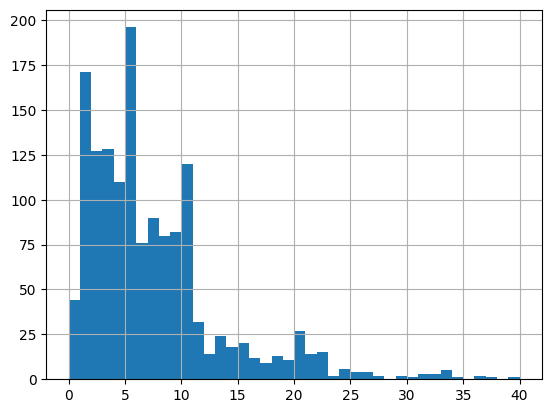

In [9]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

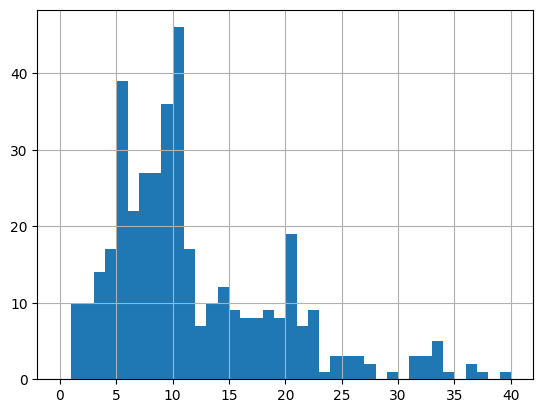

In [10]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

After sampling, the histogram of 'YearsAtCompany' shows a distribution that represents the years of service within the company more accurately.

**Cluster Random Sampling**

Cluster random sampling is a technique employed when dealing with larger populations that are dispersed across a wide area. This technique is particularly beneficial when simple random sampling is impractical or too expensive.

The procedure involves dividing the larger population into separate groups known as clusters. These clusters could be naturally occurring groups (e.g., geographical regions, schools) or determined arbitrarily by the researcher. A crucial requirement is that each cluster should ideally represent a miniature version of the population, mimicking the characteristics of the entire group as closely as possible.

The primary advantage of cluster random sampling is its ability to significantly reduce sampling costs by concentrating the sampling effort on a select number of areas or groups. This technique proves especially useful in large-scale surveys where the population is geographically dispersed. However, it is worth noting that it could lead to larger sampling errors compared to simple random sampling, especially if the clusters themselves are not homogeneous.

In the code snippet below, we illustrate the use of cluster random sampling with the employee attrition dataset.

In [11]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# After filtering, categorical values type retains all its original categories.
# we call remove_unused_categories() to only include those categories 
# that are actually in the filtered dataset
attrition_filtered.loc[:, 'JobRole'] = attrition_filtered['JobRole'].cat\
                                        .remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole')\
                    .sample(n = 10, random_state = 2022)

# Print the sample
display(attrition_clust.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
886,41,0.0,Non-Travel,552,Human_Resources,4,Bachelor,Human_Resources,High,Male,...,Excellent,Medium,1,10,4,Better,3,2,1,2
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
189,34,0.0,Travel_Rarely,829,Human_Resources,3,College,Human_Resources,High,Male,...,Excellent,High,1,4,1,Bad,3,2,0,2


In this example, we treat each 'JobRole' as a cluster. We randomly select four roles, filter our data to include only employees with these roles, and then perform simple random sampling within each of these clusters. By doing so, we ensure that our final sample contains a balanced representation of each selected 'JobRole'.

# **Sampling Distribution of a Statistic**

In statistics, the concept of "sampling distribution of a statistic" signifies how a specific sample statistic (like the mean) could fluctuate across multiple samples extracted from the same population.

Generally, when we extract a sample from a population, our objective is to measure a specific outcome. However, our measurements or predictions are subject to error, given that they are reliant on a sample. In other words, if we were to draw a different sample, we could get different results. Therefore, we're interested in assessing how varied these results could potentially be, a phenomenon we refer to as sampling variability.

In cases where we have access to lot of data, we could draw multiple samples and directly observe the variability of the sample statistic. An interesting observation is that the distribution of a sample statistic, such as the mean, tends to be more normalized and bell-shaped compared to the distribution of the original data.

Furthermore, the more data our sample statistic is based on, the closer its distribution comes to a bell-shaped curve. Larger samples also result in a narrower distribution of the sample statistic. Hence, as we collect more data, our sample statistic becomes a more accurate estimate of the population's true value.

The following block of code demonstrates this concept. Here, we take 1000 samples, each of size 60, from our population. For each sample, we calculate the mean attrition, and then plot a histogram of these means.

In [12]:
def sample_statistic(df, column, replication, sample_size, statistic):
    stats = []
    for _ in range(replication):
        sample = df.sample(n = sample_size)[column]
        if statistic == 'mean':
            stats.append(sample.mean())
        elif statistic == 'std':
            stats.append(sample.std(ddof = 1))
    return stats

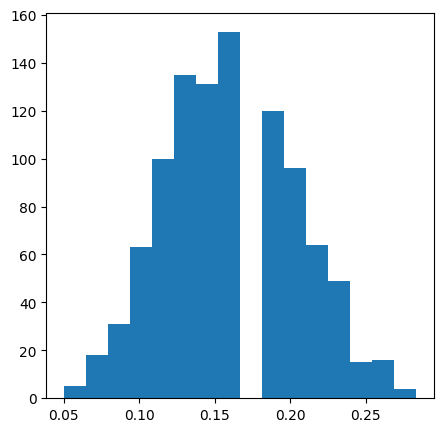

In [13]:
mean_attritions = sample_statistic(attrition_pop, 'Attrition', 1000, 60, 'mean')
fig = plt.figure(figsize = (5,5))
plt.hist(mean_attritions, bins=16)
plt.show()

## **Central Limit Theorem**

The Central Limit Theorem (CLT) is a key principle in statistics, stating that when an high number of samples are taken from a population, the distribution of sample means will approximate a normal curve, regardless of the shape of the population distribution. However, this holds true only when the sample size is sufficiently large and the data's deviation from normality isn't too significant.

To illustrate this, let's analyze how varying sample sizes - specifically, 20, 100, 400, and 800 - affect the distribution of sample means:

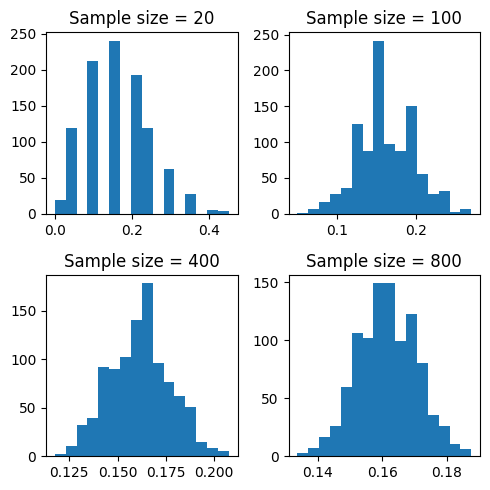

In [14]:
sample_sizes = [20, 100, 400, 800]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

# Flatten the axes array for easier iterating
axs = axs.flatten()

for i, sample_size in enumerate(sample_sizes):
    mean_attritions = sample_statistic(attrition_pop, 'Attrition', 1000, sample_size, 'mean')
    axs[i].hist(mean_attritions, bins=16)
    axs[i].set_title(f'Sample size = {sample_size}')

plt.tight_layout()
plt.show()


The visualization demonstrates the two primary implications of the CLT:

1. Normality: The distribution of sample means progressively approximates a normal distribution as the sample size increases. This outcome holds even if the underlying population distribution isn't normal.

2. Decreasing Variability(standard error): The spread of the sampling distribution narrows with larger sample sizes, indicating that larger samples provide more consistent and reliable estimates of the population mean.

**Standard Error**

The standard error (SE) quantifies the potential variation of our sample mean from the true population mean. It serves as an indicator of our sample mean's precision.

A smaller standard error implies that the sample mean is a more trustworthy estimator of the population mean.

The theoretical standard error can be calculated when the population parameters are known. In practice, this is rarely the case, but it serves as a benchmark. The formula for this is:

$$\text{SE} = \frac{\sigma}{\sqrt{n}} $$

where $\sigma$ represents the standard deviation of the population and $n$ represents the sample size.

In reality, the population parameters are rarely known. Instead, we estimate them from the sample data. Here's how you can estimate the standard error:

1. Collect a number of brand-new samples from the population.
   
2. For each new sample, calculate the statistic (e.g., mean).

3. Calculate the standard deviation of the statistics computed in step 2; use this as
your estimate of standard error.

The estimated standard error will get closer to the theoretical standard error as the sample size increases, assuming that the sample is representative of the population.

In [15]:
sample_sizes = [20, 100, 400, 800]
standard_errors = []

for sample_size in sample_sizes:
    sample_means = sample_statistic(attrition_pop, 'Attrition', 1000, sample_size, 'mean')
    standard_error = np.std(sample_means, ddof=1)
    
    standard_errors.append(standard_error)

for i, sample_size in enumerate(sample_sizes):
    print(f'Sample size = {sample_size}, Standard Error = {standard_errors[i]:.3f}')

Sample size = 20, Standard Error = 0.081
Sample size = 100, Standard Error = 0.036
Sample size = 400, Standard Error = 0.016
Sample size = 800, Standard Error = 0.009


When the population standard deviation (σ) is known, we can directly calculate the standard error for each sample size:

In [16]:
pop_std_dev = attrition_pop['Attrition'].std(ddof=1)

sample_sizes = [20, 100, 400, 800]

standard_errors = [pop_std_dev / np.sqrt(n) for n in sample_sizes]

for i, sample_size in enumerate(sample_sizes):
    print(f'Sample size = {sample_size}, Standard Error = {standard_errors[i]:.3f}')


Sample size = 20, Standard Error = 0.082
Sample size = 100, Standard Error = 0.037
Sample size = 400, Standard Error = 0.018
Sample size = 800, Standard Error = 0.013


# **Bootstrap Distribution**

Bootstrap resampling (i.e., sampling with replacement from a data set) is a powerful statistical technique that provides a robust way to estimate the sampling distribution of a statistic or model parameters. It involves drawing additional samples, with replacement, from the original sample and recalculating the statistic or model for each resample. The fundamental advantage of this approach is that it makes no assumptions about the data or the sample statistic being normally distributed.


The bootstrap approach can be conceptualized as replicating the original sample thousands or even millions of times to generate a hypothetical population that encapsulates all the knowledge from your original sample but in a larger volume. Samples are then drawn from this hypothetical population to estimate a sampling distribution.

<center><img src = "Images/bootstrap.png" width="600" height="200"/></center>

In practice, it's not necessary to replicate the sample a vast number of times physically. Instead, we sample with replacement, effectively creating an infinite population where the probability of an element being drawn remains consistent from draw to draw.

To implement bootstrap resampling for estimating the mean from a sample of size $n$, follow these steps:

1. **Select an original sample from the population:** Draw a sample of $n$ observations selected from the population. The sample mean of this original sample serves as an estimate of the population mean.
2. **Generate a bootstrap sample:** Draw a sample of size $n$ with replacement from the original sample. This means you're creating a new sample by randomly selecting n observations from your original sample, and some observations may appear more than once while others may not appear at all.
3. **Calculate the statistic of interest:** Record the mean of the $n$ resampled values.
4. **Repeat steps 1–3 N times**: This process generates a distribution of means from N bootstrap samples.
5. **Analyze the bootstrap distribution:**
    - Calculate their standard deviation, which estimates the sample mean standard error.
    - Produce a histogram or boxplot to visually assess the distribution of the resampled means.
    - Calculate a confidence interval to quantify the precision of the estimated mean.


In the realm of machine learning, bootstrapping is often used in ensemble methods, such as Bagging and Random Forests, to improve model robustness and stability. It involves creating multiple subsets of the original dataset, with replacement, training a model on each subset, and then aggregating the predictions. The aggregation could be a simple average in the case of regression, or a majority vote for classification. This method helps reduce variance and overfitting.

In [17]:
spotify_pop = pd.read_feather(SPOTIFY)
spotify_pop.head(2)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.972,['David Bauer'],0.567,313293.0,5.22155,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.321,['Etta James'],0.821,360240.0,6.00400,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0


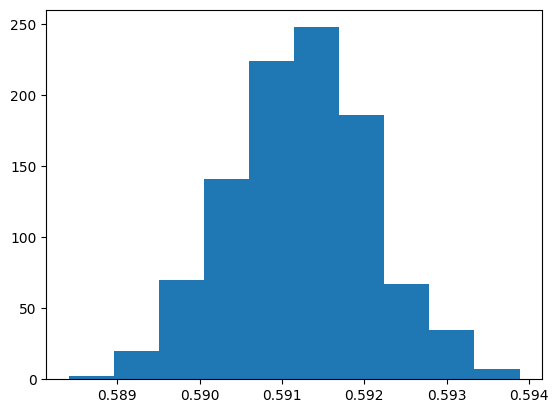

In [18]:
mean_danceability_1000 = []
# Bootstrap
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_pop.sample(frac=1, replace=True)['danceability'])
	)

# histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

## **Sampling vs Bootstrap distributions**

Bootstrap distributions often reflect the sample mean closely, but this doesn't always yield beneficial outcomes. If the original sample doesn't accurately represent the population, the bootstrap distribution mean may not be an accurate estimate of the population mean. Bootstrap method doesn't have the power to rectify any potential biases arising due to differences between the sample and the population.

Let's illustrate this by comparing the means of our population, bootstrap distribution, and sample distribution:


In [19]:
# Population mean
mean_pop = spotify_pop['popularity'].mean()
printest('Population mean',mean_pop)

# Initial Sample from Population
initial_sample = spotify_pop.sample(frac = 0.5)

# Sample mean
mean_pop = initial_sample['popularity'].mean()
printest('Sample mean', mean_pop)

# Mean Bootstrap Distribution
mean_popularity_1000 = []
for i in range(500):
    mean_popularity_1000.append(
        np.mean(initial_sample.sample(frac=1, replace=True)['popularity'])
    )
bootstrap_dist_mean = mean_popularity_1000
printest('Bootstrap Distribution mean', np.mean(bootstrap_dist_mean))

# Mean Sampling Distribution from the initial sample
mean_popularity_1000 = []
for i in range(500):
    mean_popularity_1000.append(
        np.mean(initial_sample.sample(frac = 0.5)['popularity'])
    )
sampling_dist_mean = mean_popularity_1000
printest('Sample Distribution mean', np.mean(sampling_dist_mean))


Population mean : 
 54.837142308430955 

Sample mean : 
 54.88270597272902 

Bootstrap Distribution mean : 
 54.88749683118878 

Sample Distribution mean : 
 54.88927655079701 



In conclusion,

 - The sample mean serves as an estimate of the population mean, computed from a single sample of data.

- The mean of the bootstrap distribution approximates the mean of our original sample. It gives us an understanding of the variability and possible bias in our sample mean estimate.

While the bootstrap method can be useful for understanding the variability and potential bias in our sample mean, it doesn't necessarily provide a reliable estimate of the population mean, especially when the original sample isn't a good representation of the population. This is where traditional sampling methods and the concept of confidence intervals become crucial, as they assist us in making more robust estimates of population parameters.

**Sampling and Bootstrap Standard Deviations**

One of the primary objectives of bootstrapping is to quantify the variability we might anticipate in our sample statistic as it varies from one sample to another. This measure of variability, also known as the standard error, can be obtained through the standard deviation of the sampling distribution of our statistic.

The standard deviation of the bootstrap means is a powerful estimator of this variability. When we multiply the standard error by the square root of the sample size, we get an estimate of the standard deviation of the population.







In [26]:
# std dev popularity
std_pop = spotify_pop['popularity'].std()
printest('std dev popularity', std_pop)

initial_sample = spotify_pop.sample(frac = 0.5)

# Sample std dev popularity
std_pop = initial_sample['popularity'].std()
printest('Sample std dev', std_pop)

printest('Bootstrap Distribution std dev', np.std(bootstrap_dist_mean, ddof=1)* np.sqrt(len(initial_sample)))

printest('Sample Distribution std dev', np.std(sampling_dist_mean, ddof=1)*np.sqrt(len(initial_sample)))

std dev popularity : 
 10.880195870824291 

Sample std dev : 
 10.801446656663524 

Bootstrap Distribution std dev : 
 10.749558218242186 

Sample Distribution std dev : 
 9.772667647310712 



As we can see, the standard deviation of the bootstrap distribution provides a close estimate to the standard deviation of the population, indicating that bootstrapping can effectively quantify the variability in our sample statistic. This is because the standard error is an estimate of the standard deviation of the sample mean, and when multiplied by the square root of the sample size (which is the number of sample means we have), it approximates the standard deviation of the population.

This method is particularly useful when the population standard deviation is unknown and only a single sample from the population is available, which is often the case in practical scenarios.

# **Confidence Intervals**

Confidence intervals are associated with a coverage level, usually expressed as a high percentage, such as $90\%$ or $95\%$. The coverage level refers to the probability that the interval contains the population parameter. A $90\%$ confidence interval can be understood as the range that encompasses the central $90\%$ of the bootstrap sampling distribution of a sample statistic.

To put it another way, an $x\%$ confidence interval around a sample estimate is expected to contain similar sample estimates $x\%$ of the time, provided a comparable sampling procedure is employed.

For constructing a bootstrap confidence interval for a sample statistic from a sample of size n, follow these steps:

1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (N) times.
4. For an $x\%$ confidence interval, trim [(100-x) / 2]% of the N resample results from
either end of the distribution.
5. The trim points are the endpoints of an $x\%$ bootstrap confidence interval.

This procedure provides an empirical approach to gauging uncertainty and does not make any assumptions about the population's distribution, making it widely applicable and robust.

Let's say you are calculating a 95% confidence interval. This implies that you want the middle 95% of the data. The term [(100 - 95) / 2] calculates how much data to trim from each end of the distribution to achieve this. In this case, you would trim 2.5% from the lower end and 2.5% from the upper end. The remaining data, between these two trimmed points, make up your 95% confidence interval.

In essence, you are cutting off the most extreme values (both high and low) and keeping the central part of the distribution, which contains the most likely values for your parameter of interest according to the bootstrap procedure.